In [31]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt 

In [26]:
#Add CSV file
math_df = pd.read_csv("Resources/2006-2012-math-test-results-charter-schools-1.csv")
math_df

,DBN,Grade,Year,Demographic,Number Tested,Mean Scale Score,Num Level 1,Pct Level 1,Num Level 2,Pct Level 2,Num Level 3,Pct Level 3,Num Level 4,Pct Level 4,Num Level 3 and 4,Pct Level 3 and 4
0,84K355,5,2006,All Students,72,664,1,1.4,24,33.3,41,56.9,6,8.3,47,65.3
1,84K355,5,2007,All Students,64,688,0,0,4,6.3,44,68.8,16,25,60,93.8
2,84K355,5,2008,All Students,76,688,1,1.3,2,2.6,50,65.8,23,30.3,73,96.1
3,84K355,5,2009,All Students,52,703,0,0,0,0,21,40.4,31,59.6,52,100
4,84K355,5,2010,All Students,79,692,0,0,11,13.9,49,62,19,24.1,68,86.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1830,84X730,All Grades,2008,All Students,163,NaN,6,3.7,35,21.5,104,63.8,18,11,122,74.8
1831,84X730,All Grades,2009,All Students,161,NaN,3,1.9,17,10.6,120,74.5,21,13,141,87.6
1832,84X730,All Grades,2010,All Students,161,NaN,3,1.9,62,38.5,71,44.1,25,15.5,96,59.6
1833,84X730,All Grades,2011,All Students,157,681,2,1.3,69,43.9,77,49,9,5.7,86,54.8


In [20]:
#Create New Data Frame With Relevant Columns

Math_06_12_df = math_df[["DBN", "Grade", "Year", "Number Tested", "Mean Scale Score"]].copy()
Math_06_12_df


,DBN,Grade,Year,Number Tested,Mean Scale Score
0,84K355,5,2006,72,664
1,84K355,5,2007,64,688
2,84K355,5,2008,76,688
3,84K355,5,2009,52,703
4,84K355,5,2010,79,692
...,...,...,...,...,...
1830,84X730,All Grades,2008,163,NaN
1831,84X730,All Grades,2009,161,NaN
1832,84X730,All Grades,2010,161,NaN
1833,84X730,All Grades,2011,157,681


In [29]:
#Filter by 3rd Grade
# grade3_math_06_12 = Math_06_12_df[Math_06_12_df.Grade == 3]

# grade3_math_06_12

# Math_06_12_df.loc[“3”]

# Math_06_12_df.loc[(Math_06_12_df['Grade'] == 3)

grade_3 = Math_06_12_df[Math_06_12_df["Grade"] == '3']
grade_3

,DBN,Grade,Year,Number Tested,Mean Scale Score
29,84K356,3,2008,85,714
30,84K356,3,2009,77,705
31,84K356,3,2010,86,700
32,84K356,3,2011,78,694
33,84K356,3,2012,69,697
...,...,...,...,...,...
1804,84X730,3,2008,42,672
1805,84X730,3,2009,42,674
1806,84X730,3,2010,47,699
1807,84X730,3,2011,47,685


<BarContainer object of 289 artists>

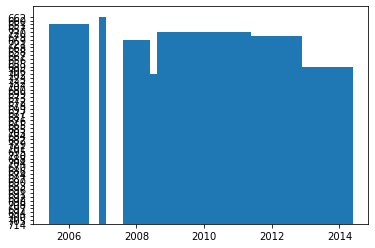

In [32]:
plt.bar(grade_3["Year"], grade_3["Mean Scale Score"])